https://www.kaggle.com/code/anthonyssetimba/notebookf51f843efb/edit

In [55]:
import pandas as pd
import seaborn as sn
import matplotlib as mat

In [66]:
cancer = pd.read_excel("Ssetimba.xlsx")
cancer


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1. Show the distribution of the variable "perimeter_mean" and explain your observations.

In [57]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Generating the perimeter mean and generate histogram

array([[<Axes: title={'center': 'perimeter_mean'}>]], dtype=object)

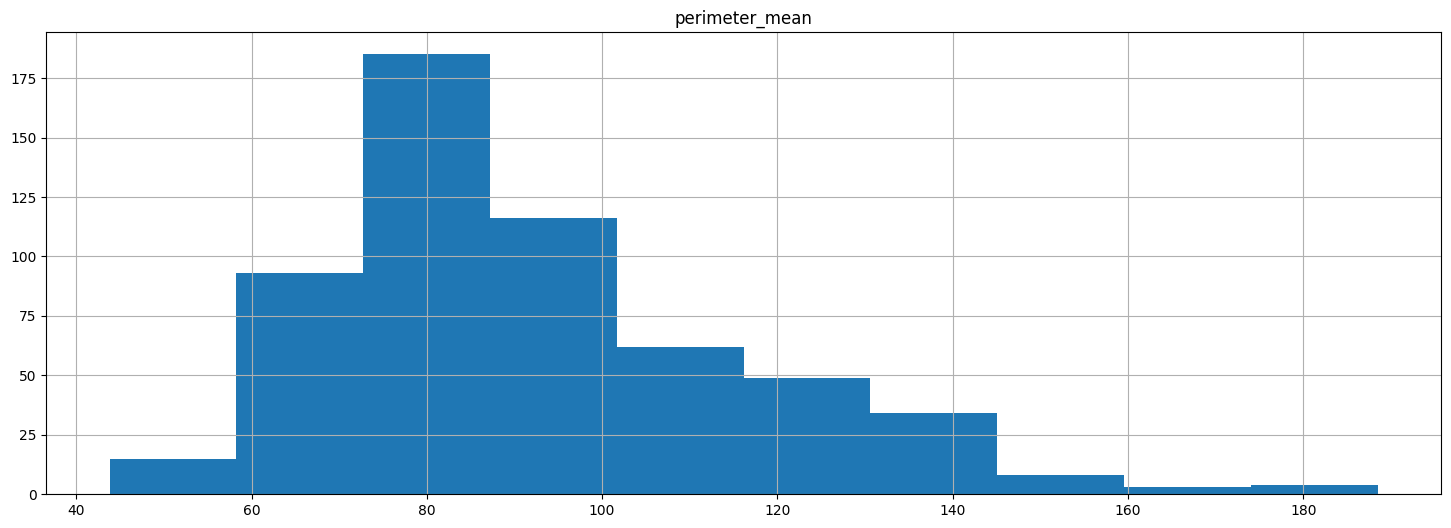

In [58]:
# generate perimeter mean 
cancer.hist(['perimeter_mean'],figsize=(18,6))

### Statistics of perimeter_mean

In [59]:
cancer["perimeter_mean"].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

#### Explanation
Mean shows the  average value of a dataset.
The s

### Identification of Outiers

In [60]:
desc = cancer.perimeter_mean.describe()

Q1=desc[4]
Q3=desc[6]
IQR=Q3 - Q1 
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
outliers = cancer[cancer.perimeter_mean < lower_bound].perimeter_mean
print("Outliers: ",cancer[(cancer.perimeter_mean < lower_bound) | (cancer.perimeter_mean > upper_bound)].perimeter_mean.values)

Anything outside this range is an outlier: ( 31.775000000000013 , 147.49499999999998 )
Outliers:  [171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]


C:\Users\Tonny\AppData\Local\Temp\ipykernel_12296\3011597593.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1=desc[4]
C:\Users\Tonny\AppData\Local\Temp\ipykernel_12296\3011597593.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3=desc[6]


### 4. Check the effective size of the perimeter_mean and discuss it.

In [61]:
print("Effective size:", cancer['perimeter_mean'].nunique())

Effective size: 522


### 5. What is the marginal probability of the perimeter_mean?

In [62]:
cancer['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [63]:
# creating bins
bins=[0,20,40,60,80,100,120,140,160,180,200]
labels=['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160','160-180','180-200']

cancer['perimeter_bin']=pd.cut(cancer['perimeter_mean'], bins=bins, labels=labels, right=False)

perimeter_probability=cancer['perimeter_mean'].value_counts(normalize=True).sort_index()
perimeter_probability

perimeter_mean
43.79     0.001757
47.92     0.001757
47.98     0.001757
48.34     0.001757
51.71     0.001757
            ...   
171.50    0.001757
174.20    0.001757
182.10    0.001757
186.90    0.001757
188.50    0.001757
Name: proportion, Length: 522, dtype: float64

### 6.What is the probability of a tumour having a perimeter_mean less than or equal to 20?

In [64]:
#the probability of a tumor being less then or equal 
print("Probability of perimeter mean <= 20:",(cancer['perimeter_mean'] <= 20).mean())


Probability of perimeter mean <= 20: 0.0


### 7.What is the relationship between any two continuous variables in the cancer dataset?

AttributeError: module 'matplotlib' has no attribute 'title'

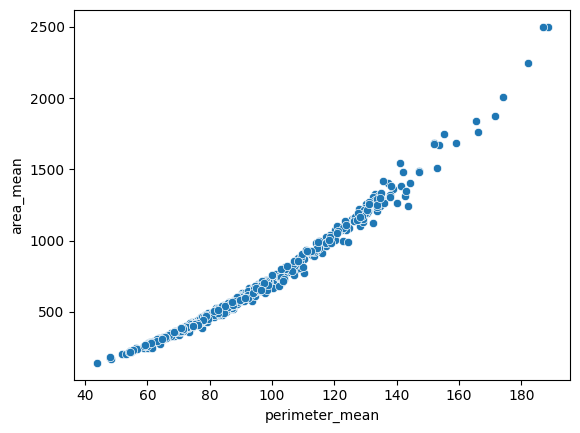

In [65]:
#the relationship between any two continuous variables in the cancer dataset
sn.scatterplot(x='perimeter_mean', y='area_mean', data=cancer)
mat.title('Relationship between the Perimeter Mean and Area Mean of the Cancer Dataset')
mat.xlabel('Radius Mean Values')
mat.ylabel('Area Mean Values')
mat.grid(True)
mat.show()